In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

%matplotlib inline

In [527]:
train_df=pd.read_excel('./Data_Train.xlsx')

In [528]:
test_df = pd.read_excel('./Test_set.xlsx')

In [529]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [530]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [531]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [532]:
#train_df['Airline'].unique()

In [533]:
final_df=train_df.append(test_df)
final_df.head()

C:\Users\gdgis\AppData\Local\Temp\ipykernel_18256\2632932177.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [534]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [535]:
# final_df['Airline']=final_df['Airline'].map({'IndiGo':1, 'Air India':2, 'Jet Airways':3, 'SpiceJet':5,
#        'Multiple carriers':6, 'GoAir':7, 'Vistara':8, 'Air Asia':9,
#        'Vistara Premium economy':10, 'Jet Airways Business':11,
#        'Multiple carriers Premium economy':12, 'Trujet':13})

In [536]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [537]:
#final_df['Date_of_Journey']= pd.to_datetime(final_df['Date_of_Journey'])

In [538]:
final_df['Date'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0]).astype(int)
final_df['Month'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1]).astype(int)
final_df['Year'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2]).astype(int)

In [539]:
final_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [540]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [541]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[0]).astype(int)
final_df['Arrival_min'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [542]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [543]:
final_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [544]:
final_df['Dep_Time'] = final_df['Dep_Time'].apply(lambda x:x.split(' ')[0])

In [545]:
final_df['Dep_hour'] = final_df['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)
final_df['Dep_min'] = final_df['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [546]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
 14  Dep_hour         13354 non-null  int32  
 15  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [547]:
final_df.drop(['Dep_Time'],axis=1,inplace=True)

In [548]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [549]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [550]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [551]:
final_df.drop([9039],axis=0,inplace=True)

In [552]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [553]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13353 non-null  object 
 5   Total_Stops      13353 non-null  int64  
 6   Additional_Info  13353 non-null  object 
 7   Price            10682 non-null  float64
 8   Date             13353 non-null  int32  
 9   Month            13353 non-null  int32  
 10  Year             13353 non-null  int32  
 11  Arrival_hour     13353 non-null  int32  
 12  Arrival_min      13353 non-null  int32  
 13  Dep_hour         13353 non-null  int32  
 14  Dep_min          13353 non-null  int32  
dtypes: float64(1), int32(7), int64(1), object(6)
memory usage: 1.3+ MB


In [554]:
final_df.drop(['Route'],axis=1,inplace=True)

In [555]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50
2660,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50


In [556]:
final_df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [557]:
final_df.drop([6474,2660],axis=0,inplace=True)

In [558]:
final_df['Duration']=final_df['Duration'].apply(lambda x:x.split(' '))

for i in range(len(final_df)):
    if len(final_df['Duration'].iloc[i])==1:
        final_df['Duration'].iloc[i].append('00m')
    

In [559]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,"[2h, 50m]",0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,"[7h, 25m]",2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,"[19h, 00m]",2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,"[5h, 25m]",1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,"[4h, 45m]",1,No info,13302.0,1,3,2019,21,35,16,50


In [560]:
def change_to_min(df):
    for i in range(len(df)):
        df['Duration'].iloc[i] = (int(df['Duration'].iloc[i][0].split('h')[0])*60)+int(df['Duration'].iloc[i][1].split('m')[0])
    return df

In [561]:
tester_df = change_to_min(final_df)

C:\Users\gdgis\AppData\Local\Temp\ipykernel_18256\1829501584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'].iloc[i] = (int(df['Duration'].iloc[i][0].split('h')[0])*60)+int(df['Duration'].iloc[i][1].split('m')[0])


In [562]:
final_df['Duration']=tester_df['Duration'].astype(int)

In [563]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,No info,13302.0,1,3,2019,21,35,16,50


### When to use One-Hot encoding and Label encoding?
- Depending upon the data encoding technique is selected.

#### Label encoder is used when:
- The number of categories is quite large as one-hot encoding can lead to high memory consumption.
- When the order does not matter in categorical feature.

#### One Hot encoder is used when:

- When the order does not matter in categorical features
- Categories in a feature are fewer.

##### Note: The model will misunderstand the data to be in some kind of order, 0 < 1 < 2. For e.g. In the above six classes’ example for “State” column, the model misunderstood a relationship between these values as follows: 0 < 1 < 2 < 3 < 4 < 5. To overcome this problem, we can use one-hot encoding as explained below.

So here it is better to use one-hot encoding and use Label_encoding on 'Additional_info' but to get better control I will use manual label_encoding.

In [565]:
#oht = OneHotEncoder()
#final_df['Airline'], final_df['Source'],final_df['Destination'],final_df['Additional_Info'] = oht.fit_transform(final_df['Airline']),oht.fit_transform(final_df['Source']),oht.fit_transform(final_df['Destination']),oht.fit_transform(final_df['Additional_Info'])


In [523]:
#le = LabelEncoder()
#final_df['Airline'], final_df['Source'],final_df['Destination'],final_df['Additional_Info'] = le.fit_transform(final_df['Airline']),le.fit_transform(final_df['Source']),le.fit_transform(final_df['Destination']),le.fit_transform(final_df['Additional_Info'])

In [577]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [578]:
final_df['Additional_Info']=final_df['Additional_Info'].map({'No info':0, 'In-flight meal not included':2,
       'No check-in baggage included':1, '1 Short layover':7, 'No Info':0,
       '1 Long layover':5, 'Change airports':6, 'Business class':8,
       'Red-eye flight':3, '2 Long layover':4})

We will use OneHotEncoding using get_dummies().

In [568]:
final_df=pd.get_dummies(final_df, columns=['Airline','Source','Destination'])
final_df.head()

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,No info,3897.0,24,3,2019,1,10,22,...,0,0,0,0,0,0,0,0,0,1
1,445,2,No info,7662.0,1,5,2019,13,15,5,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,No info,13882.0,9,6,2019,4,25,9,...,0,1,0,0,0,1,0,0,0,0
3,325,1,No info,6218.0,12,5,2019,23,30,18,...,0,0,1,0,1,0,0,0,0,0
4,285,1,No info,13302.0,1,3,2019,21,35,16,...,0,0,0,0,0,0,0,0,0,1


In [580]:
final_df.head()

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,0,3897.0,24,3,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,445,2,0,7662.0,1,5,13,15,5,50,...,0,0,1,0,1,0,0,0,0,0
2,1140,2,0,13882.0,9,6,4,25,9,25,...,0,1,0,0,0,1,0,0,0,0
3,325,1,0,6218.0,12,5,23,30,18,5,...,0,0,1,0,1,0,0,0,0,0
4,285,1,0,13302.0,1,3,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [581]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13350 entries, 0 to 2670
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Duration                                   13350 non-null  int32  
 1   Total_Stops                                13350 non-null  int64  
 2   Additional_Info                            13350 non-null  int64  
 3   Price                                      10680 non-null  float64
 4   Date                                       13350 non-null  int32  
 5   Month                                      13350 non-null  int32  
 6   Arrival_hour                               13350 non-null  int32  
 7   Arrival_min                                13350 non-null  int32  
 8   Dep_hour                                   13350 non-null  int32  
 9   Dep_min                                    13350 non-null  int32  
 10  Airline_Air Asia       

<AxesSubplot:>

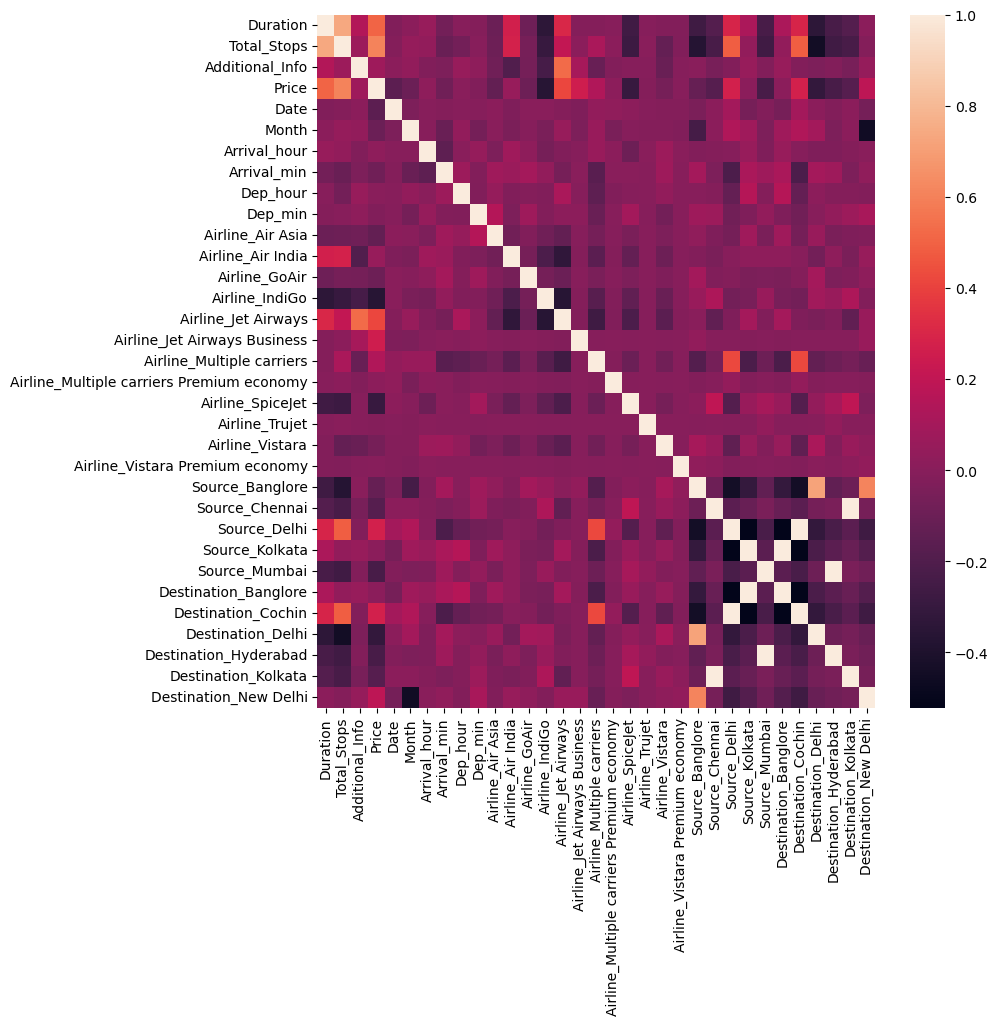

In [582]:
plt.figure(figsize=(9,9))
sns.heatmap(final_df.corr())

Since year is the same everywhere we don't need it.

In [572]:
final_df.drop('Year',axis=1,inplace=True)

In [583]:
final_df.corr()>0.5

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total_Stops,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Additional_Info,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Price,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Date,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arrival_hour,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Arrival_min,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Dep_hour,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Dep_min,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

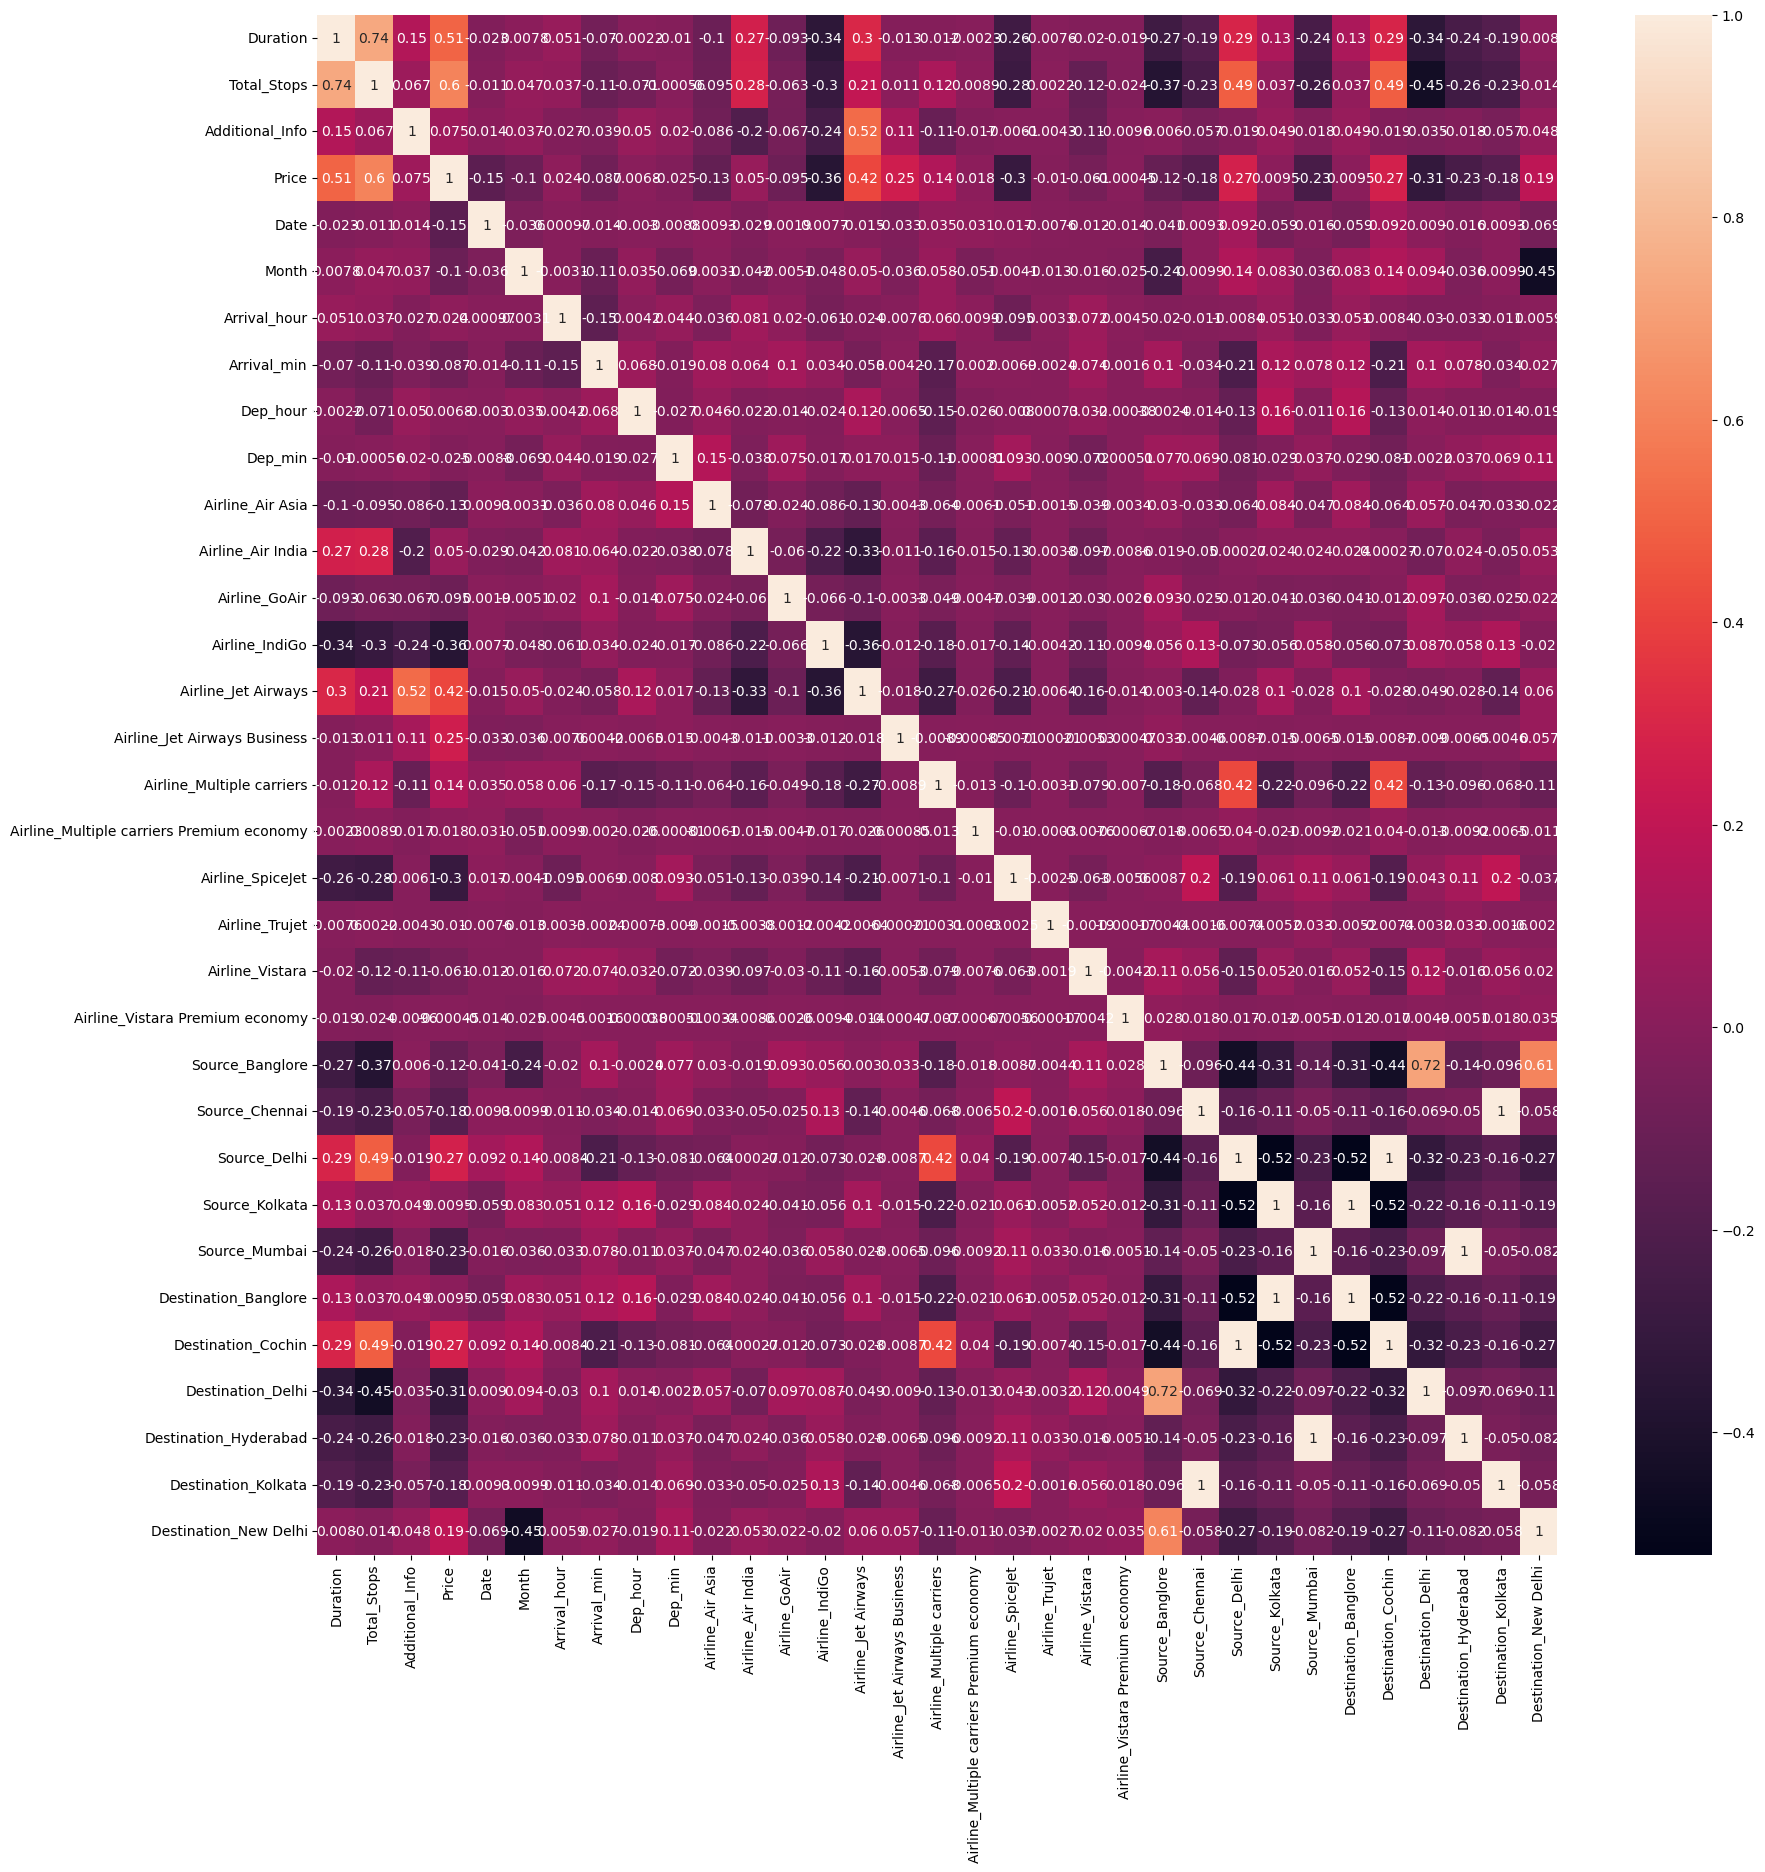

In [584]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(),annot=True)

In [637]:
final_df=final_df.reset_index()

In [638]:
final_df.drop('index',axis=1,inplace=True)

In [643]:
final_df[final_df['Price'].isnull()]

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10680,655,1,0,NaN,6,6,4,25,17,30,...,0,1,0,0,0,1,0,0,0,0
10681,240,1,0,NaN,12,5,10,20,6,20,...,0,0,1,0,1,0,0,0,0,0
10682,1425,1,2,NaN,21,5,19,0,19,15,...,0,1,0,0,0,1,0,0,0,0
10683,780,1,0,NaN,21,5,21,0,8,0,...,0,1,0,0,0,1,0,0,0,0
10684,170,0,0,NaN,24,6,2,45,23,55,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13345,1435,1,0,NaN,6,6,20,25,20,30,...,0,0,1,0,1,0,0,0,0,0
13346,155,0,0,NaN,27,3,16,55,14,20,...,0,0,1,0,1,0,0,0,0,0
13347,395,1,0,NaN,6,3,4,25,21,50,...,0,1,0,0,0,1,0,0,0,0
13348,915,1,0,NaN,6,3,19,15,4,0,...,0,1,0,0,0,1,0,0,0,0


In [647]:
train_df = final_df[:10680]
train_df.shape

(10680, 33)

In [648]:
test_df = final_df[10680:]
test_df.shape

(2670, 33)